In [1]:
# Import Libraries
%matplotlib notebook
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
# The path to our CSV file
file = "Resources/spotify_data.csv"

# Read our CSV file
spotify_data_df = pd.read_csv(file)
spotdf = spotify_data_df
#set graph parameters
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

In [2]:
spotify_data_df.columns

Index(['Ad-Supported MAU (mil)', 'Ad-Supported MAU change (mil)',
       'Premium Users (mil)', 'Premium Users change(mil)',
       'Total Monthly Active Users (mil)',
       'Total Monthly Active Users change(mil)', 'Total Revenue (mil)',
       'Total Revenue Q. Change (mil)', 'Year', 'Quarter'],
      dtype='object')

In [5]:
#Spotify Premium user vs non premium between 2018-2021 Pie graph - kayla

In [6]:
# % changes of 1st quarter 2018 - last quarter 2019 Bar graph - kayla

In [7]:
# % changes of 1st quarter 2020 - last quarter 2021 Bar graph - ricky

In [8]:
#Difference Between 2018-2019 data & 2020-2021 data bar graph  - ricky

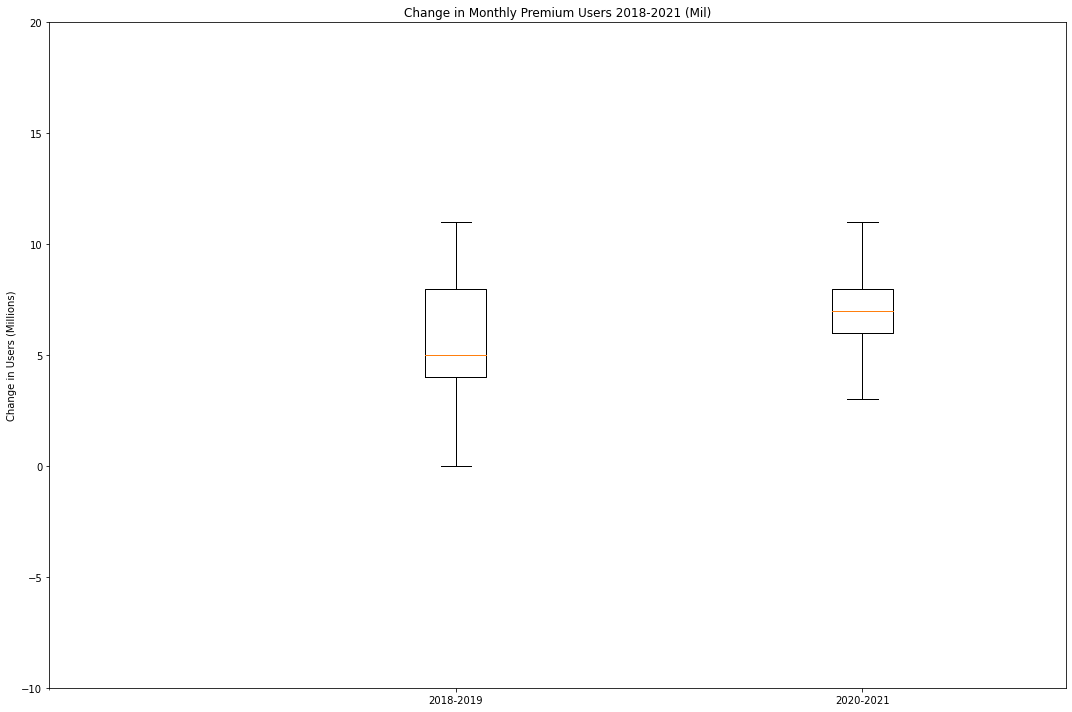

For 2018-2019:
The average monthly change of users is: 5.9
The lower quartile of change in users is: 4.0
The upper quartile of change in users is: 8.0
The interquartile range of change in users is: 4.0
The the median of change in users is: 5.0 
Values below -2.0 could be outliers.
Values above 14.0 could be outliers.
-------------------
For 2020-2021:
The average monthly change of users is: 7.0
The lower quartile of change in users is: 6.0
The upper quartile of change in users is: 8.0
The interquartile range of change in users is: 2.0
The the median of change in users is: 7.0 
Values below 3.0 could be outliers.
Values above 11.0 could be outliers.


<Figure size 1080x720 with 0 Axes>

In [5]:
#Difference Between 2018-2019 data & 2020-2021 data Box plot /t test pvlaue - Aaron
# Split the data into two arrays, 2018-2019 and 2020-2021.  This represents pre- and post-Covid data.
# Using the column indicating the change in number of premium users between quarters we can best see the direct impact
# of Covid on the subscribed user population.
df_1 = spotdf.iloc[:9,:]
df_2 = spotdf.iloc[9:,:]
premchg1 = df_1["Premium Users change(mil)"]
premchg2 = df_2["Premium Users change(mil)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Change in Monthly Premium Users 2018-2021 (Mil)')
ax1.set_ylabel('Change in Users (Millions)')
ax1.boxplot([premchg1, premchg2])
plt.ylim((-10,20))
labels = ['2018-2019', '2020-2021']
x = np.arange(len(labels))
ax1.set_xticks(x, minor=True);ax1.set_xticklabels(labels)
plt.show()

# Below we show other data regarding the quarterly change in premium subscribers.

print("For 2018-2019:")
quartiles1 = premchg1.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
avgchg1 = round(df_1["Premium Users change(mil)"].mean(),1)
print(f"The average monthly change of users is: {avgchg1}")
print(f"The lower quartile of change in users is: {lowerq1}")
print(f"The upper quartile of change in users is: {upperq1}")
print(f"The interquartile range of change in users is: {iqr1}")
print(f"The the median of change in users is: {quartiles1[0.5]} ")
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

print("-------------------")
print("For 2020-2021:")
quartiles2 = premchg2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
avgchg2 = round(df_2["Premium Users change(mil)"].mean(),1)
print(f"The average monthly change of users is: {avgchg2}")
print(f"The lower quartile of change in users is: {lowerq2}")
print(f"The upper quartile of change in users is: {upperq2}")
print(f"The interquartile range of change in users is: {iqr2}")
print(f"The the median of change in users is: {quartiles2[0.5]} ")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")
plt.savefig("Figures/boxplot.png")

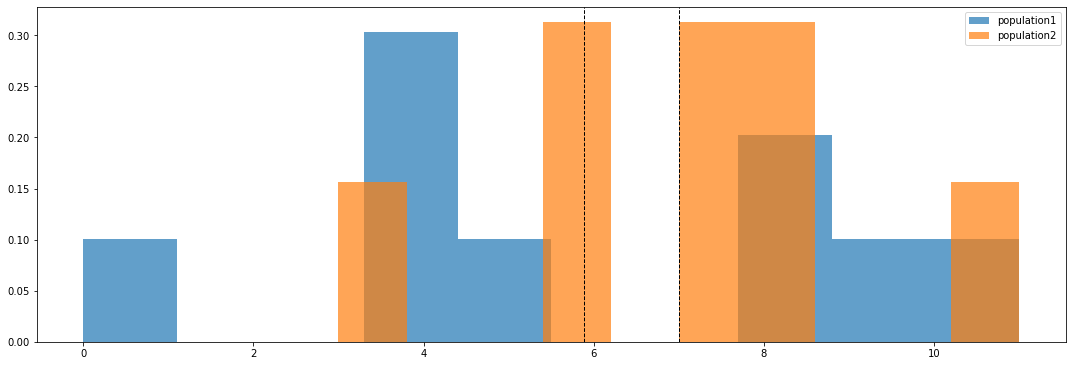

In [7]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(premchg1, 10, density=True, alpha=0.7, label="population1")
plt.hist(premchg2, 10, density=True, alpha=0.7, label="population2")
plt.axvline(premchg1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(premchg2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.savefig("Figures/histogram.png")


In [117]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(premchg1, premchg2, equal_var=False)

Ttest_indResult(statistic=-0.8049833219245712, pvalue=0.43423473280824654)

<function matplotlib.pyplot.show(close=None, block=None)>

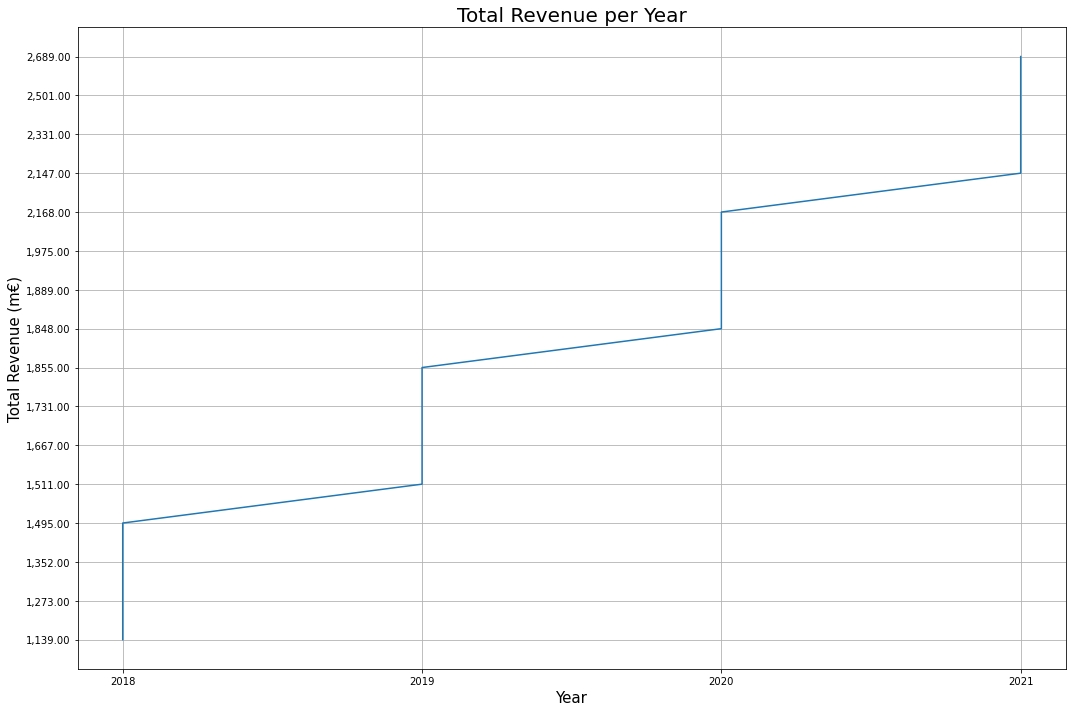

In [71]:
#Bar Graph for revenue change per year 2018-2021 line graph - lizz
plt.plot(spotify_data_df["Year"],spotify_data_df["Total Revenue (m€)"])
plt.xticks([2018,2019,2020,2021])
plt.yticks()
plt.grid()
plt.title("Total Revenue per Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Revenue (m€)", fontsize=15)
plt.savefig("Figures/Revenue_per_Year.png")
plt.show

In [8]:
#Bar Graph for revenue change per quarter 2018 line graph -lizz
#Make DF for Quarters in 2018
year = spotify_data_df.loc[spotify_data_df["Year"] == "2018"]
plt.plot(year["Quarter"],year["Total Revenue (m€)"])

plt.grid()
plt.title("2018 Total Revenue per Quarter", fontsize=20)
plt.xlabel("Quarter", fontsize=15)
plt.ylabel("Total Revenue (m€)", fontsize=15)

plt.show

KeyError: 'Total Revenue (m€)'

In [ ]:
#Bar Graph for revenue change per quarter 2019 line graph -lizz
#Make DF for Quarters in 2019

In [ ]:
#Bar Graph for revenue change per quarter 2020 line graph - lizz
#Make DF for Quarters in 2020

In [ ]:
#Bar Graph for revenue change per quarter 2021 line graph - lizz
#Make DF for Quarters in 2021